# Data Analysis Project: Bike Sharing Dataset
- **Name:** Ridwan Halim
- **Email:** ridwaanhall.dev@gmail.com (old version: erbyl14@gmail.com)
- **Dicoding ID:** ridwaanhall


## About dataset

[Bike Sharing Dataset](https://github.com/ridwaanhall/dicoding-bike-sharing-analysis/tree/main/data)

- **instant**: record index
- **dteday**: date
- **season**: season
	- 1: spring
	- 2: summer
	- 3: fall
	- 4: winter
- **yr**: year
	- 0: 2011
	- 1: 2012
- **mnth**: month
	- 1 to 12
- **hr**: hour
	- 0 to 23
- **holiday**: whether the day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- **weekday**: day of the week
- **workingday**: if the day is neither weekend nor holiday is 1, otherwise is 0
- **weathersit**:
	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pellets + Thunderstorm + Mist, Snow + Fog
- **temp**: Normalized temperature in Celsius. The values are divided by 41 (max)
- **atemp**: Normalized feeling temperature in Celsius. The values are divided by 50 (max)
- **hum**: Normalized humidity. The values are divided by 100 (max)
- **windspeed**: Normalized wind speed. The values are divided by 67 (max)
- **casual**: count of casual users
- **registered**: count of registered users
- **cnt**: count of total rental bikes including both casual and registered


## Determining Business Questions

- In which season are bikes rented the most and the least?
- What is the relationship between weather conditions and the total bike rentals (`total`)?
- How do bike rental trends differ between working days (`workingday`) and weekends/holidays (`holiday`)?

## Import All Packages/Libraries Used

In [145]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
data_day = pd.read_csv('data/day.csv')
data_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
data_hour = pd.read_csv('data/hour.csv')
data_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

#### Assessing `data_day`

##### Get info from `data_day`

In [4]:
data_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight:**

- The dataset is a `pandas` DataFrame.
- It contains 731 entries.
- There are 16 columns in total.
- All columns have no missing values.
- Data types:
  - 4 columns of type `float64`: `temp`, `atemp`, `hum`, `windspeed`
  - 11 columns of type `int64`: `instant`, `season`, `yr`, `mnth`, `holiday`, `weekday`, `workingday`, `weathersit`, `casual`, `registered`, `cnt`
  - 1 column of type `object`: `dteday`
- Memory usage: 91.5+ KB

---

**Mistakes:**

Points to be noted further:

Column `dteday`: The data type of this column is `object`. If this column contains dates, it should be converted to `datetime` data type.

##### Get describe from `data_day`

In [5]:
data_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- The dataset has 731 entries.
- **Mean Values**:
  - Average temperature (`temp`): 0.495
  - Average feeling temperature (`atemp`): 0.474
  - Average humidity (`hum`): 0.628
  - Average windspeed: 0.190
  - Average casual rentals: 848
  - Average registered rentals: 3656
  - Average total rentals (`cnt`): 4504

- **Standard Deviation**:
  - High variability in casual (686) and registered (1560) rentals.

- **Min and Max Values**:
  - Temperature ranges from 0.059 to 0.862
  - Feeling temperature ranges from 0.079 to 0.841
  - Humidity ranges from 0.000 to 0.973
  - Windspeed ranges from 0.022 to 0.507
  - Casual rentals range from 2 to 3410
  - Registered rentals range from 20 to 6946
  - Total rentals range from 22 to 8714

- **Quartiles**:
  - 25% of total rentals are below 3152
  - 50% of total rentals are below 4548
  - 75% of total rentals are below 5956

- **Potential Anomalies**:
   - Humidity (`hum`) has a minimum value of 0. This might be unrealistic as humidity typically does not reach 0%.
   - Windspeed (`windspeed`) also has a minimum value of 0. This might indicate a windless day, but it should be checked if this is reasonable or if there is a measurement error.
   - There is a significant difference between the number of casual and registered rentals. This might be normal, but it should be checked for any patterns or anomalies.
   - The maximum value for casual rentals is 3410, which is quite high compared to the average of 848. This might indicate certain days with very high rental activity.
   - The maximum value for registered rentals is 6946, which is also quite high compared to the average of 3656. This might indicate certain days with very high rental activity.
   - The maximum value for total rentals (`cnt`) is 8714, which is much higher than the average of 4504. This might indicate certain days with very high rental activity.

##### Checking for missing and duplicate data

In [6]:
data_day.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Insight:**
- All columns have no missing values.

In [7]:
print(data_day.duplicated().sum())

0


**Insight:**
- No duplicate data

#### Assessing `data_hour`

##### Get info from `data_hour`

In [8]:
data_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight:**
- The dataset is a `pandas` DataFrame.
- It contains 17,379 entries.
- There are 17 columns in total.
- All columns have no missing values.
- Data types:
  - 4 columns of type `float64`: `temp`, `atemp`, `hum`, `windspeed`
  - 12 columns of type `int64`: `instant`, `season`, `yr`, `mnth`, `hr`, `holiday`, `weekday`, `workingday`, `weathersit`, `casual`, `registered`, `cnt`
  - 1 column of type `object`: `dteday`
- Memory usage: 2.3+ MB

---

**Mistakes:**

Points to be noted further:

Column `dteday`: The data type of this column is `object`. If this column contains dates, it should be converted to `datetime` data type.

##### Get describe from `data_hour`

In [9]:
data_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- The dataset has 17,379 entries.
- **Mean Values**:
  - Average hour (`hr`): 11.55
  - Average temperature (`temp`): 0.497
  - Average feeling temperature (`atemp`): 0.476
  - Average humidity (`hum`): 0.627
  - Average windspeed: 0.190
  - Average casual rentals: 35.68
  - Average registered rentals: 153.79
  - Average total rentals (`cnt`): 189.46

- **Standard Deviation**:
  - High variability in casual (49.31) and registered (151.36) rentals.

- **Min and Max Values**:
  - Temperature ranges from 0.020 to 1.000
  - Feeling temperature ranges from 0.000 to 1.000
  - Humidity ranges from 0.000 to 1.000
  - Windspeed ranges from 0.000 to 0.851
  - Casual rentals range from 0 to 367
  - Registered rentals range from 0 to 886
  - Total rentals range from 1 to 977

- **Quartiles**:
  - 25% of total rentals are below 40
  - 50% of total rentals are below 142
  - 75% of total rentals are below 281

- **Potential Anomalies**:
  - Humidity and windspeed have minimum values of 0, which might be unrealistic.
  - Casual and registered rentals have minimum values of 0, indicating no rentals at certain times.

##### Checking for missing or duplicate data

In [10]:
data_hour.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Insight:**
- All columns have no missing values.

In [11]:
print(data_hour.duplicated().sum())

0


**Insight:**
- No duplicate data

### Cleaning Data

#### Cleaning `data_day`

##### Drop (deleting) some unused columns

In [12]:
data_day = data_day.drop(columns=['windspeed', 'weekday'])
data_day.head()

,instant,dteday,season,yr,mnth,holiday,workingday,weathersit,temp,atemp,hum,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,2,0.344167,0.363625,0.805833,331,654,985
1,2,2011-01-02,1,0,1,0,0,2,0.363478,0.353739,0.696087,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,0.196364,0.189405,0.437273,120,1229,1349
3,4,2011-01-04,1,0,1,0,1,1,0.200000,0.212122,0.590435,108,1454,1562
4,5,2011-01-05,1,0,1,0,1,1,0.226957,0.229270,0.436957,82,1518,1600


Several columns were removed as they are not required for the analysis of the defined business questions.

- `windspeed`: Contains information about wind speed, which is not needed for the analysis (Irrelevant Data).
- `weekday`: Contains information about the day of the week, which is redundant since we already have `workingday` and `holiday` columns (Redundancy).

##### Rename columns

Rename columns for better readability and easy of data analysis

In [13]:
data_day.rename(columns={
    'dteday': 'date',
    'yr': 'year',
    'mnth': 'month',
    'weathersit': 'weather',
    'cnt': 'total'
}, inplace=True)

data_day.head()

,instant,date,season,year,month,holiday,workingday,weather,temp,atemp,hum,casual,registered,total
0,1,2011-01-01,1,0,1,0,0,2,0.344167,0.363625,0.805833,331,654,985
1,2,2011-01-02,1,0,1,0,0,2,0.363478,0.353739,0.696087,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,0.196364,0.189405,0.437273,120,1229,1349
3,4,2011-01-04,1,0,1,0,1,1,0.200000,0.212122,0.590435,108,1454,1562
4,5,2011-01-05,1,0,1,0,1,1,0.226957,0.229270,0.436957,82,1518,1600


##### Mapping column values from numbers to descriptions

Mapping numeric codes to descriptive labels, like `1` to "Spring" and `2` to "Summer", improves readability and makes data analysis and visualization easier to understand.

In [14]:
# Mapping column season
season_mapping = {
    1: 'Spring', 2: 'Summer',
    3: 'Fall', 4: 'Winter'
}
data_day['season'] = data_day['season'].map(season_mapping)

# Mapping column year
year_mapping = {
    0: 2011, 
    1: 2012
}
data_day['year'] = data_day['year'].map(year_mapping)

# # Mapping column holiday
# holiday_mapping = {
#     0: 'No', 1: 'Yes'
# }
# data_day['holiday'] = data_day['holiday'].map(holiday_mapping)

# # Mapping column workingday
# workingday_mapping = {
#     0: 'Holiday', 1: 'Workingday'
# }

# Mapping column month
month_mapping = {
    1: 'Jan', 2: 'Feb', 3: 'Mar',
    4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep',
    10: 'Oct', 11: 'Nov', 12: 'Dec'   
}
data_day['month'] = data_day['month'].map(month_mapping)

# Mapping column weather
weather_mapping = {
    1: 'Clear/Partly Cloudy', # Clear, Few clouds, Partly cloudy
    2: 'Mist/Cloudy',         # Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    3: 'Light Snow/Rain',     # Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    4: 'Heavy Rain/Snow'      # Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
}
data_day['weather'] = data_day['weather'].map(weather_mapping)

# Show the first 5 rows of the dataset
data_day.head()

,instant,date,season,year,month,holiday,workingday,weather,temp,atemp,hum,casual,registered,total
0,1,2011-01-01,Spring,2011,Jan,0,0,Mist,0.344167,0.363625,0.805833,331,654,985
1,2,2011-01-02,Spring,2011,Jan,0,0,Mist,0.363478,0.353739,0.696087,131,670,801
2,3,2011-01-03,Spring,2011,Jan,0,1,Clear,0.196364,0.189405,0.437273,120,1229,1349
3,4,2011-01-04,Spring,2011,Jan,0,1,Clear,0.200000,0.212122,0.590435,108,1454,1562
4,5,2011-01-05,Spring,2011,Jan,0,1,Clear,0.226957,0.229270,0.436957,82,1518,1600


##### Fixing Data Types

###### `data_day` info

In [15]:
data_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   date        731 non-null    object 
 2   season      731 non-null    object 
 3   year        731 non-null    int64  
 4   month       731 non-null    object 
 5   holiday     731 non-null    int64  
 6   workingday  731 non-null    int64  
 7   weather     731 non-null    object 
 8   temp        731 non-null    float64
 9   atemp       731 non-null    float64
 10  hum         731 non-null    float64
 11  casual      731 non-null    int64  
 12  registered  731 non-null    int64  
 13  total       731 non-null    int64  
dtypes: float64(3), int64(7), object(4)
memory usage: 80.1+ KB


Here we identify that there are datatype mismatches. For example, the `date` column should be of type `datetime`. Additionally, columns such as `season`, `year`, `month`, `holiday`, `workingday`, and `weather` should be of type `category`.

###### changing data types to appropriate ones

In [16]:
# Convert 'date' column to datetime
data_day["date"] = pd.to_datetime(data_day["date"])

# Convert specified columns to 'category' data type
category_columns = ['season', 'year', 'month', 'holiday', 'workingday', 'weather']
data_day[category_columns] = data_day[category_columns].astype('category')

# Display the updated DataFrame info
data_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   date        731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   year        731 non-null    category      
 4   month       731 non-null    category      
 5   holiday     731 non-null    category      
 6   workingday  731 non-null    category      
 7   weather     731 non-null    category      
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  hum         731 non-null    float64       
 11  casual      731 non-null    int64         
 12  registered  731 non-null    int64         
 13  total       731 non-null    int64         
dtypes: category(6), datetime64[ns](1), float64(3), int64(4)
memory usage: 51.2 KB


**Key Changes:**
  - `date` column converted from `object` to `datetime64[ns]`
  - `season`, `year`, `month`, `holiday`, `workingday`, and `weather` columns converted from `object` to `category`
  - Reduced memory usage by approximately 36%

#### Cleaning `data_hour`

##### Drop (deleting) some unused columns

In [17]:
data_hour = data_hour.drop(columns=['windspeed', 'weekday'])
data_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,workingday,weathersit,temp,atemp,hum,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,0,1,0.24,0.2879,0.81,3,13,16
1,2,2011-01-01,1,0,1,1,0,0,1,0.22,0.2727,0.80,8,32,40
2,3,2011-01-01,1,0,1,2,0,0,1,0.22,0.2727,0.80,5,27,32
3,4,2011-01-01,1,0,1,3,0,0,1,0.24,0.2879,0.75,3,10,13
4,5,2011-01-01,1,0,1,4,0,0,1,0.24,0.2879,0.75,0,1,1


Same as before, several columns were removed as they are not required for the analysis of the defined business questions.

- `windspeed`: Contains information about wind speed, which is not needed for the analysis (Irrelevant Data).
- `weekday`: Contains information about the day of the week, which is redundant since we already have `workingday` and `holiday` columns (Redundancy).

##### Rename columns

Rename columns for better readability and easy of data analysis

In [21]:
data_hour.rename(columns={
    'dteday': 'date',
    'yr': 'year',
    'mnth': 'month',
    'hr': 'hour',
    'weathersit': 'weather',
    'cnt': 'total'
}, inplace=True)

data_hour.head()

,instant,date,season,year,month,hour,holiday,workingday,weather,temp,atemp,hum,casual,registered,total
0,1,2011-01-01,Spring,2011,Jan,0,0,0,Clear,0.24,0.2879,0.81,3,13,16
1,2,2011-01-01,Spring,2011,Jan,1,0,0,Clear,0.22,0.2727,0.80,8,32,40
2,3,2011-01-01,Spring,2011,Jan,2,0,0,Clear,0.22,0.2727,0.80,5,27,32
3,4,2011-01-01,Spring,2011,Jan,3,0,0,Clear,0.24,0.2879,0.75,3,10,13
4,5,2011-01-01,Spring,2011,Jan,4,0,0,Clear,0.24,0.2879,0.75,0,1,1


##### Mapping column values from numbers to descriptions

Mapping numeric codes to descriptive labels, like `1` to "Spring" and `2` to "Summer", improves readability and makes data analysis and visualization easier to understand.

In [19]:
data_hour['season'] = data_hour['season'].map(season_mapping)
data_hour['year'] = data_hour['year'].map(year_mapping)
data_hour['month'] = data_hour['month'].map(month_mapping)
# data_hour['holiday'] = data_hour['holiday'].map(holiday_mapping)
# data_hour['workingday'] = data_hour['workingday'].map(workingday_mapping)
data_hour['weather'] = data_hour['weather'].map(weather_mapping)

data_hour.head()

,instant,date,season,year,month,hr,holiday,workingday,weather,temp,atemp,hum,casual,registered,total
0,1,2011-01-01,Spring,2011,Jan,0,0,0,Clear,0.24,0.2879,0.81,3,13,16
1,2,2011-01-01,Spring,2011,Jan,1,0,0,Clear,0.22,0.2727,0.80,8,32,40
2,3,2011-01-01,Spring,2011,Jan,2,0,0,Clear,0.22,0.2727,0.80,5,27,32
3,4,2011-01-01,Spring,2011,Jan,3,0,0,Clear,0.24,0.2879,0.75,3,10,13
4,5,2011-01-01,Spring,2011,Jan,4,0,0,Clear,0.24,0.2879,0.75,0,1,1


##### Fixing Data Types

###### `data_hour` info

In [22]:
data_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   date        17379 non-null  object 
 2   season      17379 non-null  object 
 3   year        17379 non-null  int64  
 4   month       17379 non-null  object 
 5   hour        17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   workingday  17379 non-null  int64  
 8   weather     17379 non-null  object 
 9   temp        17379 non-null  float64
 10  atemp       17379 non-null  float64
 11  hum         17379 non-null  float64
 12  casual      17379 non-null  int64  
 13  registered  17379 non-null  int64  
 14  total       17379 non-null  int64  
dtypes: float64(3), int64(8), object(4)
memory usage: 2.0+ MB


Here we identify that there are datatype mismatches. For example, the `date` column should be of type `datetime`. Additionally, columns such as `season`, `year`, `month`, `hour`, `holiday`, `workingday`, and `weather` should be of type `category`.

###### changing data types to appropriate ones

In [23]:
# Convert 'date' column to datetime
data_hour["date"] = pd.to_datetime(data_hour["date"])

# Convert specified columns to 'category' data type
category_columns = ['season', 'year', 'month', 'hour', 'holiday', 'workingday', 'weather']
data_hour[category_columns] = data_hour[category_columns].astype('category')

# Display the updated DataFrame info
data_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   date        17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   year        17379 non-null  category      
 4   month       17379 non-null  category      
 5   hour        17379 non-null  category      
 6   holiday     17379 non-null  category      
 7   workingday  17379 non-null  category      
 8   weather     17379 non-null  category      
 9   temp        17379 non-null  float64       
 10  atemp       17379 non-null  float64       
 11  hum         17379 non-null  float64       
 12  casual      17379 non-null  int64         
 13  registered  17379 non-null  int64         
 14  total       17379 non-null  int64         
dtypes: category(7), datetime64[ns](1), float64(3), int64(4)
memory usage: 

**Key Changes:**
  - `date` column converted from `object` to `datetime64[ns]`
  - `season`, `year`, `month`, `hour`, `holiday`, `workingday`, and `weather` columns converted from `object` to `category`
  - Reduced memory usage by approximately 40%

## Exploratory Data Analysis (EDA)

### Exploring `data_day`

#### Distribution of total bike rentals

In [30]:
data_day['total'].describe()

count     731.000000
mean     4504.348837
std      1937.211452
min        22.000000
25%      3152.000000
50%      4548.000000
75%      5956.000000
max      8714.000000
Name: total, dtype: float64

- The data is right-skewed, as the mean (4504.35) is less than the median (4548).
- There is a wide range of values (from 22 to 8714), indicating significant variability.
- The interquartile range (IQR) is 2804 (5956 - 3152), showing the spread of the middle 50% of the data.

#### Explore total rentals per month

In [36]:
# Grouping data by year and month, then aggregating total rentals
monthly_stats = data_day.groupby(['year', 'month']).agg(
    total_sum=('total', 'sum'),
    total_max=('total', 'max'),
    total_min=('total', 'min'),
    total_mean=('total', 'mean')
).reset_index()

# Convert month to categorical type with the correct order
monthly_stats['month'] = pd.Categorical(monthly_stats['month'], categories=month_mapping.values(), ordered=True)

# Sort by year and month
monthly_stats = monthly_stats.sort_values(['year', 'month'])

# Display the aggregated statistics
monthly_stats

C:\Users\erbyl\AppData\Local\Temp\ipykernel_12504\2710421444.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_stats = data_day.groupby(['year', 'month']).agg(


,year,month,total_sum,total_max,total_min,total_mean
4,2011,Jan,38189,1985,431,1231.903226
3,2011,Feb,48215,2927,1005,1721.964286
7,2011,Mar,64045,3239,605,2065.967742
0,2011,Apr,94870,5312,795,3162.333333
8,2011,May,135821,5805,2633,4381.322581
6,2011,Jun,143512,5515,3767,4783.733333
5,2011,Jul,141341,6043,3285,4559.387097
1,2011,Aug,136691,5895,1115,4409.387097
11,2011,Sep,127418,5423,1842,4247.266667
10,2011,Oct,123511,5511,627,3984.225806


In [40]:
for index, row in monthly_stats.iterrows():
    print(f"In {row['month']} {row['year']}, the total bike rentals were {row['total_sum']}.")
    print(f"The maximum rentals in a day were {row['total_max']}, while the minimum rentals were {row['total_min']}.")
    print(f"On average, there were {row['total_mean']:.2f} rentals per day.\n")

In Jan 2011, the total bike rentals were 38189.
The maximum rentals in a day were 1985, while the minimum rentals were 431.
On average, there were 1231.90 rentals per day.

In Feb 2011, the total bike rentals were 48215.
The maximum rentals in a day were 2927, while the minimum rentals were 1005.
On average, there were 1721.96 rentals per day.

In Mar 2011, the total bike rentals were 64045.
The maximum rentals in a day were 3239, while the minimum rentals were 605.
On average, there were 2065.97 rentals per day.

In Apr 2011, the total bike rentals were 94870.
The maximum rentals in a day were 5312, while the minimum rentals were 795.
On average, there were 3162.33 rentals per day.

In May 2011, the total bike rentals were 135821.
The maximum rentals in a day were 5805, while the minimum rentals were 2633.
On average, there were 4381.32 rentals per day.

In Jun 2011, the total bike rentals were 143512.
The maximum rentals in a day were 5515, while the minimum rentals were 3767.
On ave

In [45]:
# Find the indices of the highest and lowest total bike rentals for each year
highest_2011_idx = monthly_stats[monthly_stats['year'] == 2011]['total_sum'].idxmax()
lowest_2011_idx = monthly_stats[monthly_stats['year'] == 2011]['total_sum'].idxmin()
highest_2012_idx = monthly_stats[monthly_stats['year'] == 2012]['total_sum'].idxmax()
lowest_2012_idx = monthly_stats[monthly_stats['year'] == 2012]['total_sum'].idxmin()

print(f"In 2011, the highest total bike rentals were in {monthly_stats.loc[highest_2011_idx]['month']} with {monthly_stats.loc[highest_2011_idx]['total_sum']} rentals.")
print(f"In 2011, the lowest total bike rentals were in {monthly_stats.loc[lowest_2011_idx]['month']} with {monthly_stats.loc[lowest_2011_idx]['total_sum']} rentals.")
print(f"In 2012, the highest total bike rentals were in {monthly_stats.loc[highest_2012_idx]['month']} with {monthly_stats.loc[highest_2012_idx]['total_sum']} rentals.")
print(f"In 2012, the lowest total bike rentals were in {monthly_stats.loc[lowest_2012_idx]['month']} with {monthly_stats.loc[lowest_2012_idx]['total_sum']} rentals.\n")

In 2011, the highest total bike rentals were in Jun with 143512 rentals.
In 2011, the lowest total bike rentals were in Jan with 38189 rentals.
In 2012, the highest total bike rentals were in Sep with 218573 rentals.
In 2012, the lowest total bike rentals were in Jan with 96744 rentals.



In [48]:
# Grouping data by month and aggregating total rentals
monthly_totals = data_day.groupby('month').agg({
    'total': ['sum', 'max', 'min', 'mean']
})

monthly_totals.columns = monthly_totals.columns.droplevel(0)
monthly_totals_sorted = monthly_totals.sort_values(by='sum', ascending=False)
monthly_totals_sorted

C:\Users\erbyl\AppData\Local\Temp\ipykernel_12504\82574297.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_totals = data_day.groupby('month').agg({


,sum,max,min,mean
month,,,,
Aug,351194,7865,1115,5664.419355
Jun,346342,8120,3767,5772.366667
Sep,345991,8714,1842,5766.516667
Jul,344948,8173,3285,5563.677419
May,331686,8294,2633,5349.774194
Oct,322352,8156,22,5199.225806
Apr,269094,7460,795,4484.900000
Nov,254831,6852,1495,4247.183333
Mar,228920,8362,605,3692.258065


In [51]:
for index, row in monthly_totals_sorted.iterrows():
    print(f"In {row.name}, the total bike rentals were {row['sum']}.")
    print(f"The maximum rentals in a day were {row['max']}, while the minimum rentals were {row['min']}.")
    print(f"On average, there were {row['mean']:.2f} rentals per day.\n")

In Aug, the total bike rentals were 351194.0.
The maximum rentals in a day were 7865.0, while the minimum rentals were 1115.0.
On average, there were 5664.42 rentals per day.

In Jun, the total bike rentals were 346342.0.
The maximum rentals in a day were 8120.0, while the minimum rentals were 3767.0.
On average, there were 5772.37 rentals per day.

In Sep, the total bike rentals were 345991.0.
The maximum rentals in a day were 8714.0, while the minimum rentals were 1842.0.
On average, there were 5766.52 rentals per day.

In Jul, the total bike rentals were 344948.0.
The maximum rentals in a day were 8173.0, while the minimum rentals were 3285.0.
On average, there were 5563.68 rentals per day.

In May, the total bike rentals were 331686.0.
The maximum rentals in a day were 8294.0, while the minimum rentals were 2633.0.
On average, there were 5349.77 rentals per day.

In Oct, the total bike rentals were 322352.0.
The maximum rentals in a day were 8156.0, while the minimum rentals were 2

In [52]:
highest_total = monthly_totals_sorted['sum'].max()
lowest_total = monthly_totals_sorted['sum'].min()
highest_month = monthly_totals_sorted[monthly_totals_sorted['sum'] == highest_total].index[0]
lowest_month = monthly_totals_sorted[monthly_totals_sorted['sum'] == lowest_total].index[0]

print(f"The highest total bike rentals were in {highest_month} with {highest_total} rentals.")
print(f"The lowest total bike rentals were in {lowest_month} with {lowest_total} rentals.")

The highest total bike rentals were in Aug with 351194 rentals.
The lowest total bike rentals were in Jan with 134933 rentals.


#### Explore total rentals in each season

In [56]:
seasonal_stats = data_day.groupby('season').agg({
    'total': ['sum', 'max', 'min', 'mean'],
    'temp': ['mean', 'max', 'min', 'std'],
    'atemp': ['mean', 'max', 'min', 'std'],
    'hum': ['mean', 'max', 'min', 'std']
})

seasonal_stats

C:\Users\erbyl\AppData\Local\Temp\ipykernel_12504\3921890798.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonal_stats = data_day.groupby('season').agg({


total                               temp                      \
            sum   max   min         mean      mean       max       min   
season                                                                   
Fall    1061129  8714  1115  5644.303191  0.706309  0.861667  0.469167   
Spring   471348  7836   431  2604.132597  0.297748  0.572500  0.059130   
Summer   918589  8362   795  4992.331522  0.544405  0.808333  0.253043   
Winter   841613  8555    22  4728.162921  0.422906  0.657500  0.220833   

                     atemp                                     hum            \
             std      mean       max       min       std      mean       max   
season                                                                         
Fall    0.070848  0.655898  0.840896  0.242400  0.072056  0.633482  0.939565   
Spring  0.102735  0.296914  0.548617  0.079070  0.099026  0.582903  0.948261   
Summer  0.122650  0.520307  0.757579  0.250339  0.108022  0.626948  0.922500   
Winter  0.107834  0.415539  0.607975  0.227913  0.095536  0.668719  0.972500   

                            
             min       std  
season                      
Fall    0.360000  0.119349  
Spring  0.000000  0.151880  
Summer  0.254167  0.152841  
Winter  0.333478  0.131248

In [77]:
for season, stats in seasonal_stats.iterrows():
    print(f"Season: {season}")
    print(f"  Total Rentals: {stats[('total', 'sum')]} (Mean: {stats[('total', 'mean')]:.2f}, Max: {stats[('total', 'max')]}, Min: {stats[('total', 'min')]})")
    print(f"  Temperature: Mean: {stats[('temp', 'mean')]*41:.2f}°C, Max: {stats[('temp', 'max')]*41:.2f}°C, Min: {stats[('temp', 'min')]*41:.2f}°C, Std: {stats[('temp', 'std')]*41:.2f}°C")
    print(f"  Apparent Temperature: Mean: {stats[('atemp', 'mean')]*50:.2f}°C, Max: {stats[('atemp', 'max')]*50:.2f}°C, Min: {stats[('atemp', 'min')]*50:.2f}°C, Std: {stats[('atemp', 'std')]*50:.2f}°C")
    print(f"  Humidity: Mean: {stats[('hum', 'mean')]*100:.2f}%, Max: {stats[('hum', 'max')]*100:.2f}%, Min: {stats[('hum', 'min')]*100:.2f}%, Std: {stats[('hum', 'std')]*100:.2f}%")
    print(f"  Insights:")
    print(f"    - The highest number of rentals in a day was {stats[('total', 'max')]}.")
    print(f"    - The lowest number of rentals in a day was {stats[('total', 'min')]}.")
    print(f"    - The average number of rentals per day was {stats[('total', 'mean')]:.2f}.")
    print(f"    - The highest temperature recorded was {stats[('temp', 'max')]*41:.2f}°C.")
    print(f"    - The lowest temperature recorded was {stats[('temp', 'min')]*41:.2f}°C.")
    print(f"    - The average temperature was {stats[('temp', 'mean')]*41:.2f}°C.")
    print(f"    - The highest apparent temperature recorded was {stats[('atemp', 'max')]*50:.2f}°C.")
    print(f"    - The lowest apparent temperature recorded was {stats[('atemp', 'min')]*50:.2f}°C.")
    print(f"    - The average apparent temperature was {stats[('atemp', 'mean')]*50:.2f}°C.")
    print(f"    - The highest humidity recorded was {stats[('hum', 'max')]*100:.2f}%.")
    print(f"    - The lowest humidity recorded was {stats[('hum', 'min')]*100:.2f}%.")
    print(f"    - The average humidity was {stats[('hum', 'mean')]*100:.2f}%.")
    print()

Season: Fall
  Total Rentals: 1061129.0 (Mean: 5644.30, Max: 8714.0, Min: 1115.0)
  Temperature: Mean: 28.96°C, Max: 35.33°C, Min: 19.24°C, Std: 2.90°C
  Apparent Temperature: Mean: 32.79°C, Max: 42.04°C, Min: 12.12°C, Std: 3.60°C
  Humidity: Mean: 63.35%, Max: 93.96%, Min: 36.00%, Std: 11.93%
  Insights:
    - The highest number of rentals in a day was 8714.0.
    - The lowest number of rentals in a day was 1115.0.
    - The average number of rentals per day was 5644.30.
    - The highest temperature recorded was 35.33°C.
    - The lowest temperature recorded was 19.24°C.
    - The average temperature was 28.96°C.
    - The highest apparent temperature recorded was 42.04°C.
    - The lowest apparent temperature recorded was 12.12°C.
    - The average apparent temperature was 32.79°C.
    - The highest humidity recorded was 93.96%.
    - The lowest humidity recorded was 36.00%.
    - The average humidity was 63.35%.

Season: Spring
  Total Rentals: 471348.0 (Mean: 2604.13, Max: 7836.0,

In [79]:
highest_season_idx = seasonal_stats['total']['sum'].idxmax()
lowest_season_idx = seasonal_stats['total']['sum'].idxmin()

print(f"The highest total bike rentals were in {highest_season_idx} with {seasonal_stats.loc[highest_season_idx, ('total', 'sum')]} rentals.")
print(f"The lowest total bike rentals were in {lowest_season_idx} with {seasonal_stats.loc[lowest_season_idx, ('total', 'sum')]} rentals.")


The highest total bike rentals were in Fall with 1061129 rentals.
The lowest total bike rentals were in Spring with 471348 rentals.


In [70]:
seasonal_rentals = data_day.groupby('season')[['registered', 'casual']].sum().reset_index()
seasonal_rentals

C:\Users\erbyl\AppData\Local\Temp\ipykernel_12504\3421301144.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonal_rentals = data_day.groupby('season')[['registered', 'casual']].sum().reset_index()


,season,registered,casual
0,Fall,835038,226091
1,Spring,410726,60622
2,Summer,715067,203522
3,Winter,711831,129782


In [82]:
for index, row in seasonal_rentals.iterrows():
    print(f"In {row['season']}, there were {row['registered']} registered rentals and {row['casual']} casual rentals.")

In Fall, there were 835038 registered rentals and 226091 casual rentals.
In Spring, there were 410726 registered rentals and 60622 casual rentals.
In Summer, there were 715067 registered rentals and 203522 casual rentals.
In Winter, there were 711831 registered rentals and 129782 casual rentals.


#### Explore the impact of weather on total rentals

In [75]:
weather_stats = data_day.groupby('weather').agg({
    'total': ['sum', 'max', 'min', 'mean']
}).reset_index()

# Renaming columns for better readability
weather_stats.columns = ['Weather', 'Total Rentals (Sum)', 'Total Rentals (Max)', 'Total Rentals (Min)', 'Total Rentals (Mean)']

weather_stats

C:\Users\erbyl\AppData\Local\Temp\ipykernel_12504\4079741816.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weather_stats = data_day.groupby('weather').agg({


,Weather,Total Rentals (Sum),Total Rentals (Max),Total Rentals (Min),Total Rentals (Mean)
0,Clear,2257952,8714,431,4876.786177
1,Light Snow/Rain,37869,4639,22,1803.285714
2,Mist,996858,8362,605,4035.862348


In [84]:
for index, row in weather_stats.iterrows():
    print(f"Weather: {row['Weather']}")
    print(f"  Total Rentals: {row['Total Rentals (Sum)']} (Mean: {row['Total Rentals (Mean)']:.2f}, Max: {row['Total Rentals (Max)']}, Min: {row['Total Rentals (Min)']})")
    print(f"  Insights:")
    print(f"    - The highest number of rentals in a day was {row['Total Rentals (Max)']}.")
    print(f"    - The lowest number of rentals in a day was {row['Total Rentals (Min)']}.")
    print(f"    - The average number of rentals per day was {row['Total Rentals (Mean)']:.2f}.")
    print()

Weather: Clear
  Total Rentals: 2257952 (Mean: 4876.79, Max: 8714, Min: 431)
  Insights:
    - The highest number of rentals in a day was 8714.
    - The lowest number of rentals in a day was 431.
    - The average number of rentals per day was 4876.79.

Weather: Light Snow/Rain
  Total Rentals: 37869 (Mean: 1803.29, Max: 4639, Min: 22)
  Insights:
    - The highest number of rentals in a day was 4639.
    - The lowest number of rentals in a day was 22.
    - The average number of rentals per day was 1803.29.

Weather: Mist
  Total Rentals: 996858 (Mean: 4035.86, Max: 8362, Min: 605)
  Insights:
    - The highest number of rentals in a day was 8362.
    - The lowest number of rentals in a day was 605.
    - The average number of rentals per day was 4035.86.



In [85]:
# Determine the weather condition with the highest and lowest total rentals
highest_weather_idx = weather_stats['Total Rentals (Sum)'].idxmax()
lowest_weather_idx = weather_stats['Total Rentals (Sum)'].idxmin()

print(f"The highest total bike rentals were in {weather_stats.loc[highest_weather_idx]['Weather']} weather with {weather_stats.loc[highest_weather_idx]['Total Rentals (Sum)']} rentals.")
print(f"The lowest total bike rentals were in {weather_stats.loc[lowest_weather_idx]['Weather']} weather with {weather_stats.loc[lowest_weather_idx]['Total Rentals (Sum)']} rentals.")

The highest total bike rentals were in Clear weather with 2257952 rentals.
The lowest total bike rentals were in Light Snow/Rain weather with 37869 rentals.


### Exploring `data_hour`

#### Explore total rentals per hour on working days

In [113]:
filter_workingday = data_hour[data_hour["workingday"] == 1] # Workingday

# Group by hour and aggregate total rentals
data_hour_workingday = filter_workingday.groupby('hour').agg(
    total_sum=('total', 'sum'),
    total_max=('total', 'max'),
    total_min=('total', 'min'),
    total_mean=('total', 'mean')
)

data_hour_workingday_sorted = data_hour_workingday.sort_values(by='total_sum', ascending=False)

data_hour_workingday_sorted

C:\Users\erbyl\AppData\Local\Temp\ipykernel_12504\1252575733.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_hour_workingday = filter_workingday.groupby('hour').agg(


,total_sum,total_max,total_min,total_mean
hour,,,,
17,262120,976,26,525.290581
18,245129,977,26,492.226908
8,236595,839,31,477.006048
19,173504,743,18,348.401606
16,146268,634,13,293.122244
7,144144,596,18,290.612903
20,124360,567,23,249.718876
9,119793,426,23,241.518145
15,100263,601,13,201.331325


In [114]:
for index, row in data_hour_workingday_sorted.iterrows():
    print(f"At hour {row.name}, the total bike rentals were {row['total_sum']} in last 2 years.")
    print(f"The maximum rentals in an hour were {row['total_max']}, while the minimum rentals were {row['total_min']}.")
    print(f"On average, there were {row['total_mean']:.2f} rentals per hour.\n")

At hour 17, the total bike rentals were 262120.0 in last 2 years.
The maximum rentals in an hour were 976.0, while the minimum rentals were 26.0.
On average, there were 525.29 rentals per hour.

At hour 18, the total bike rentals were 245129.0 in last 2 years.
The maximum rentals in an hour were 977.0, while the minimum rentals were 26.0.
On average, there were 492.23 rentals per hour.

At hour 8, the total bike rentals were 236595.0 in last 2 years.
The maximum rentals in an hour were 839.0, while the minimum rentals were 31.0.
On average, there were 477.01 rentals per hour.

At hour 19, the total bike rentals were 173504.0 in last 2 years.
The maximum rentals in an hour were 743.0, while the minimum rentals were 18.0.
On average, there were 348.40 rentals per hour.

At hour 16, the total bike rentals were 146268.0 in last 2 years.
The maximum rentals in an hour were 634.0, while the minimum rentals were 13.0.
On average, there were 293.12 rentals per hour.

At hour 7, the total bike 

In [117]:
# Find the hour with the maximum and minimum rentals in the last 2 years
max_hour = data_hour_workingday_sorted['total_sum'].idxmax()
min_hour = data_hour_workingday_sorted['total_sum'].idxmin()

max_hour_total = data_hour_workingday_sorted.loc[max_hour, 'total_sum']
min_hour_total = data_hour_workingday_sorted.loc[min_hour, 'total_sum']

print(f"The hour with the maximum rentals in the last 2 years is {max_hour} with a total of {max_hour_total} rentals.")
print(f"The hour with the minimum rentals in the last 2 years is {min_hour} with a total of {min_hour_total} rentals.")

time_of_day_mapping = {
    0: 'early morning', 1: 'early morning', 2: 'early morning', 3: 'early morning', 4: 'early morning', 5: 'early morning',
    6: 'morning', 7: 'morning', 8: 'morning', 9: 'morning', 10: 'morning', 11: 'morning',
    12: 'afternoon', 13: 'afternoon', 14: 'afternoon', 15: 'afternoon', 16: 'afternoon', 17: 'afternoon',
    18: 'evening', 19: 'evening', 20: 'evening', 21: 'evening', 22: 'evening', 23: 'evening'
}

max_hour_time_of_day = time_of_day_mapping[max_hour]
min_hour_time_of_day = time_of_day_mapping[min_hour]

print(f"In the last 2 years, the highest total bike rentals occurred in the {max_hour_time_of_day} around {max_hour}:00 to {max_hour + 1}:00.")
print(f"The lowest total bike rentals occurred in the {min_hour_time_of_day} around {min_hour}:00 to {min_hour + 1}:00.")

The hour with the maximum rentals in the last 2 years is 17 with a total of 262120 rentals.
The hour with the minimum rentals in the last 2 years is 3 with a total of 2323 rentals.
In the last 2 years, the highest total bike rentals occurred in the afternoon around 17:00 to 18:00.
The lowest total bike rentals occurred in the early morning around 3:00 to 4:00.


#### Explore total rentals per hour on holidays

In [118]:
# Filter data for holidays or non-working days
filter_holiday = data_hour[(data_hour["holiday"] == 1) | (data_hour["workingday"] == 0)] # yes and holiday

data_hour_holiday = filter_holiday.groupby(by='hour').agg({
    'total': ['sum', 'max', 'min', 'mean']
})

data_hour_holiday.columns = data_hour_holiday.columns.droplevel(0)
data_hour_holiday_sorted = data_hour_holiday.sort_values(by='sum', ascending=False)
data_hour_holiday_sorted

C:\Users\erbyl\AppData\Local\Temp\ipykernel_12504\4276855310.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_hour_holiday = filter_holiday.groupby(by='hour').agg({


,sum,max,min,mean
hour,,,,
13,86101,760,30,372.731602
12,84606,776,32,366.259740
14,84233,750,23,364.645022
15,82886,750,7,358.813853
16,81480,783,11,352.727273
17,74740,731,15,323.549784
11,72838,663,27,315.316017
18,64643,676,23,281.056522
10,59115,539,12,255.909091


In [119]:
for index, row in data_hour_holiday_sorted.iterrows():
    print(f"At hour {row.name}, the total bike rentals were {row['sum']} in last 2 years.")
    print(f"The maximum rentals in an hour were {row['max']}, while the minimum rentals were {row['min']}.")
    print(f"On average, there were {row['mean']:.2f} rentals per hour.\n")

At hour 13, the total bike rentals were 86101.0 in last 2 years.
The maximum rentals in an hour were 760.0, while the minimum rentals were 30.0.
On average, there were 372.73 rentals per hour.

At hour 12, the total bike rentals were 84606.0 in last 2 years.
The maximum rentals in an hour were 776.0, while the minimum rentals were 32.0.
On average, there were 366.26 rentals per hour.

At hour 14, the total bike rentals were 84233.0 in last 2 years.
The maximum rentals in an hour were 750.0, while the minimum rentals were 23.0.
On average, there were 364.65 rentals per hour.

At hour 15, the total bike rentals were 82886.0 in last 2 years.
The maximum rentals in an hour were 750.0, while the minimum rentals were 7.0.
On average, there were 358.81 rentals per hour.

At hour 16, the total bike rentals were 81480.0 in last 2 years.
The maximum rentals in an hour were 783.0, while the minimum rentals were 11.0.
On average, there were 352.73 rentals per hour.

At hour 17, the total bike rent

In [122]:
max_hour = data_hour_holiday_sorted['sum'].idxmax()
min_hour = data_hour_holiday_sorted['sum'].idxmin()

max_hour_total = data_hour_holiday_sorted.loc[max_hour, 'sum']
min_hour_total = data_hour_holiday_sorted.loc[min_hour, 'sum']

print(f"The hour with the maximum rentals in the last 2 years is {max_hour} with a total of {max_hour_total} rentals.")
print(f"The hour with the minimum rentals in the last 2 years is {min_hour} with a total of {min_hour_total} rentals.")

max_hour_time_of_day = time_of_day_mapping[max_hour]
min_hour_time_of_day = time_of_day_mapping[min_hour]

print(f"In the last 2 years, the highest total bike rentals occurred in the {max_hour_time_of_day} around {max_hour}:00 to {max_hour + 1}:00.")
print(f"The lowest total bike rentals occurred in the {min_hour_time_of_day} around {min_hour}:00 to {min_hour + 1}:00.")

The hour with the maximum rentals in the last 2 years is 13 with a total of 86101 rentals.
The hour with the minimum rentals in the last 2 years is 4 with a total of 1876 rentals.
In the last 2 years, the highest total bike rentals occurred in the afternoon around 13:00 to 14:00.
The lowest total bike rentals occurred in the early morning around 4:00 to 5:00.


## Visualization & Explanatory Analysis

### Question 1: In which season are bikes rented the most and the least?

C:\Users\erbyl\AppData\Local\Temp\ipykernel_12504\556510448.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonal_totals = data_day.groupby('season')[['registered', 'casual']].sum().reset_index()


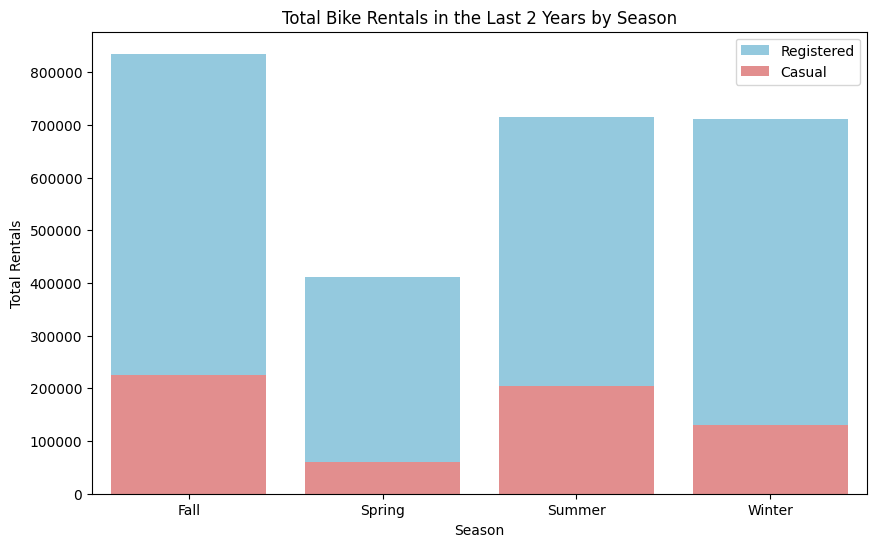

In [125]:
seasonal_totals = data_day.groupby('season')[['registered', 'casual']].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(
    data=seasonal_totals, 
    x='season', 
    y='registered', 
    label='Registered', 
    color='skyblue'
)
sns.barplot(
    data=seasonal_totals, 
    x='season', 
    y='casual', 
    label='Casual', 
    color='lightcoral'
)
plt.title('Total Bike Rentals in the Last 2 Years by Season')
plt.xlabel('Season')
plt.ylabel('Total Rentals')
plt.legend()
plt.show()

From the image above, we can see that the highest total bike rentals occur in the fall season with registered customers exceeding casual customers, and the lowest in the spring season with registered customers exceeding casual customers.

### Question 2: What is the relationship between weather conditions and the total bike rentals (`total`)?

C:\Users\erbyl\AppData\Local\Temp\ipykernel_12504\455004473.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  plot_weather = data_day.groupby(by='weather').agg({
C:\Users\erbyl\AppData\Local\Temp\ipykernel_12504\455004473.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


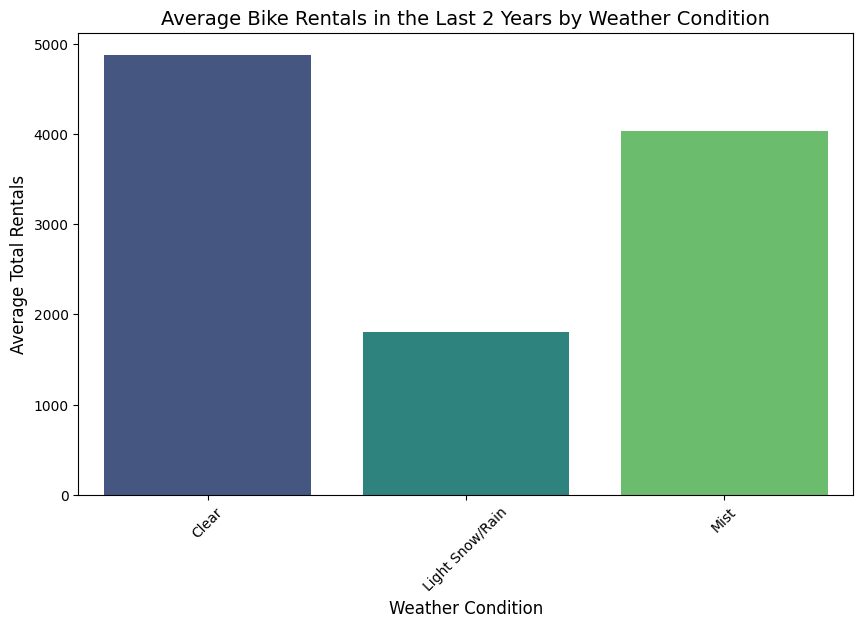

In [126]:
# Create a variable for average total rentals based on weather
plot_weather = data_day.groupby(by='weather').agg({
    'total': 'mean'
}).reset_index()

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(
    data=plot_weather, 
    x='weather', 
    y='total',
    palette='viridis'
)
plt.xlabel('Weather Condition', fontsize=12)
plt.ylabel('Average Total Rentals', fontsize=12)
plt.title('Average Bike Rentals in the Last 2 Years by Weather Condition', fontsize=14)
plt.xticks(rotation=45)
plt.show()

- Clear weather conditions are the most favorable for bike rentals, indicating that people prefer to rent bikes when the weather is pleasant.
- Light snow/rain conditions result in the lowest average rentals, suggesting that adverse weather conditions discourage people from renting bikes.
- The significant difference in rentals between clear and light snow/rain conditions highlights the impact of weather on bike rental behavior.

### Question 3: How do bike rental trends differ between working days (`workingday`) and weekends/holidays (`holiday`)?

##### `workingday`

C:\Users\erbyl\AppData\Local\Temp\ipykernel_12504\3456107570.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  plot_hour_workingday = filter_workingday.groupby('hour').agg({


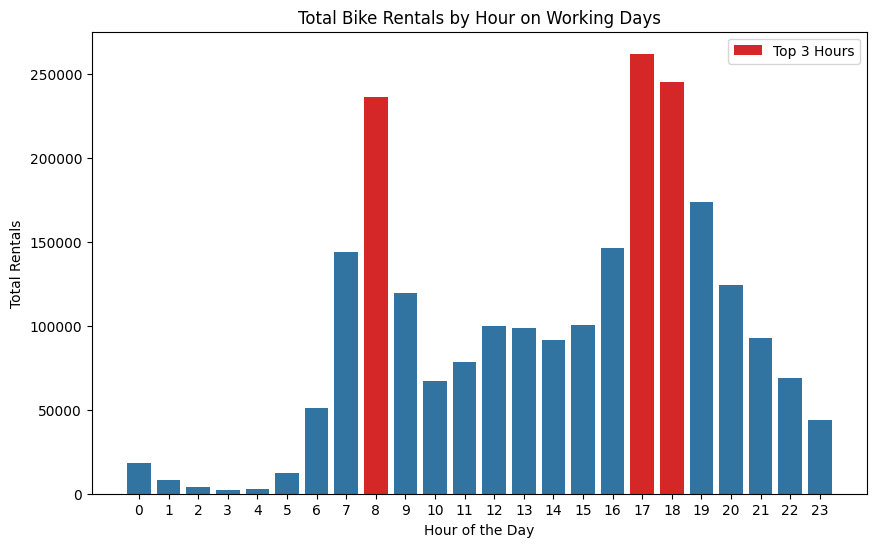

In [131]:
plot_hour_workingday = filter_workingday.groupby('hour').agg({
    'total': 'sum'
}).reset_index()

plt.figure(figsize=(10, 6))

# Determine the indices of the columns with the three highest totals
top_3_cols = plot_hour_workingday['total'].nlargest(3).index

sns.barplot(
    data=plot_hour_workingday, 
    x='hour', 
    y='total',
    color='tab:blue'
)

# Highlight the top 3 columns in red
for col in top_3_cols:
    plt.bar(col, plot_hour_workingday.loc[col, 'total'], color='tab:red', label='Top 3 Hours' if col == top_3_cols[0] else "")

plt.title("Total Bike Rentals by Hour on Working Days")
plt.xlabel('Hour of the Day')
plt.ylabel('Total Rentals')
plt.legend()
plt.show()

- Total bike rentals on working days are mostly around 8 AM and around 5 to 6 PM, which are used for commuting to and from work.
- The data indicates that bike rentals peak during typical commuting hours, suggesting that many users rely on bikes for their daily commute.
- This pattern highlights the importance of providing adequate bike infrastructure and services during these peak times to accommodate the high demand and ensure a smooth commuting experience for users.

##### `holiday`

C:\Users\erbyl\AppData\Local\Temp\ipykernel_12504\1453885529.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  plot_hour_holiday = filter_holiday.groupby(by='hour').agg({


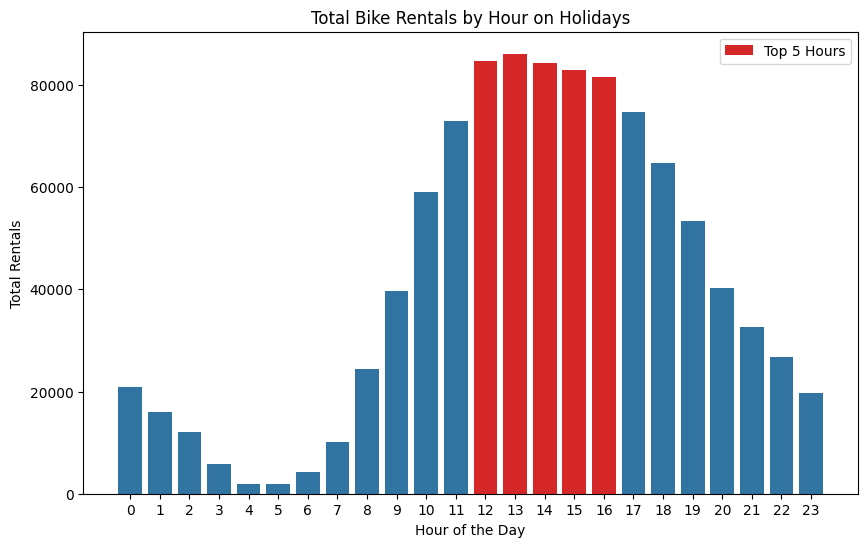

In [135]:
plot_hour_holiday = filter_holiday.groupby(by='hour').agg({
    'total': 'sum'
}).reset_index()

plt.figure(figsize=(10, 6))

top_5_cols = plot_hour_holiday['total'].nlargest(5).index

sns.barplot(
    data=plot_hour_holiday, 
    x='hour', 
    y='total',
    color='tab:blue'
)

for col in top_5_cols:
    plt.bar(col, plot_hour_holiday.loc[col, 'total'], color='tab:red', label='Top 5 Hours' if col == top_5_cols[0] else "")

plt.title("Total Bike Rentals by Hour on Holidays")
plt.xlabel('Hour of the Day')
plt.ylabel('Total Rentals')
plt.legend()
plt.show()

- During holidays or weekends, people tend to rent bikes more frequently in the afternoon, between 12 PM and 4 PM.
- This pattern suggests that bike rentals are more associated with leisure activities during these times, as opposed to commuting during working hours.
- The peak rental hours on holidays indicate a preference for outdoor activities and recreational use of bikes.
- Understanding these trends can help in better allocation of bike resources and planning for maintenance during off-peak hours.

## Advanced Analysis (Optional)

In [139]:
rfm_df = data_hour.groupby(by="hour", as_index=False).agg({
    "date": "max",
    "instant": "nunique",
    "total": "sum"
})

rfm_df.columns = ["hour", "last_order_date", "order_count", "revenue"]

# Calculate recency in days
rfm_df["last_order_date"] = rfm_df["last_order_date"].dt.date
recent_date = data_hour["date"].dt.date.max()
rfm_df["recency"] = rfm_df["last_order_date"].apply(lambda x: (recent_date - x).days)

# Drop the 'last_order_date' column as it is no longer needed
rfm_df.drop("last_order_date", axis=1, inplace=True)

rfm_df.head()

C:\Users\erbyl\AppData\Local\Temp\ipykernel_12504\3571793412.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rfm_df = data_hour.groupby(by="hour", as_index=False).agg({


,hour,order_count,revenue,recency
0,0,726,39130,0
1,1,724,24164,0
2,2,715,16352,0
3,3,697,8174,0
4,4,697,4428,0


C:\Users\erbyl\AppData\Local\Temp\ipykernel_12504\83666401.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\erbyl\AppData\Local\Temp\ipykernel_12504\83666401.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\erbyl\AppData\Local\Temp\ipykernel_12504\83666401.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


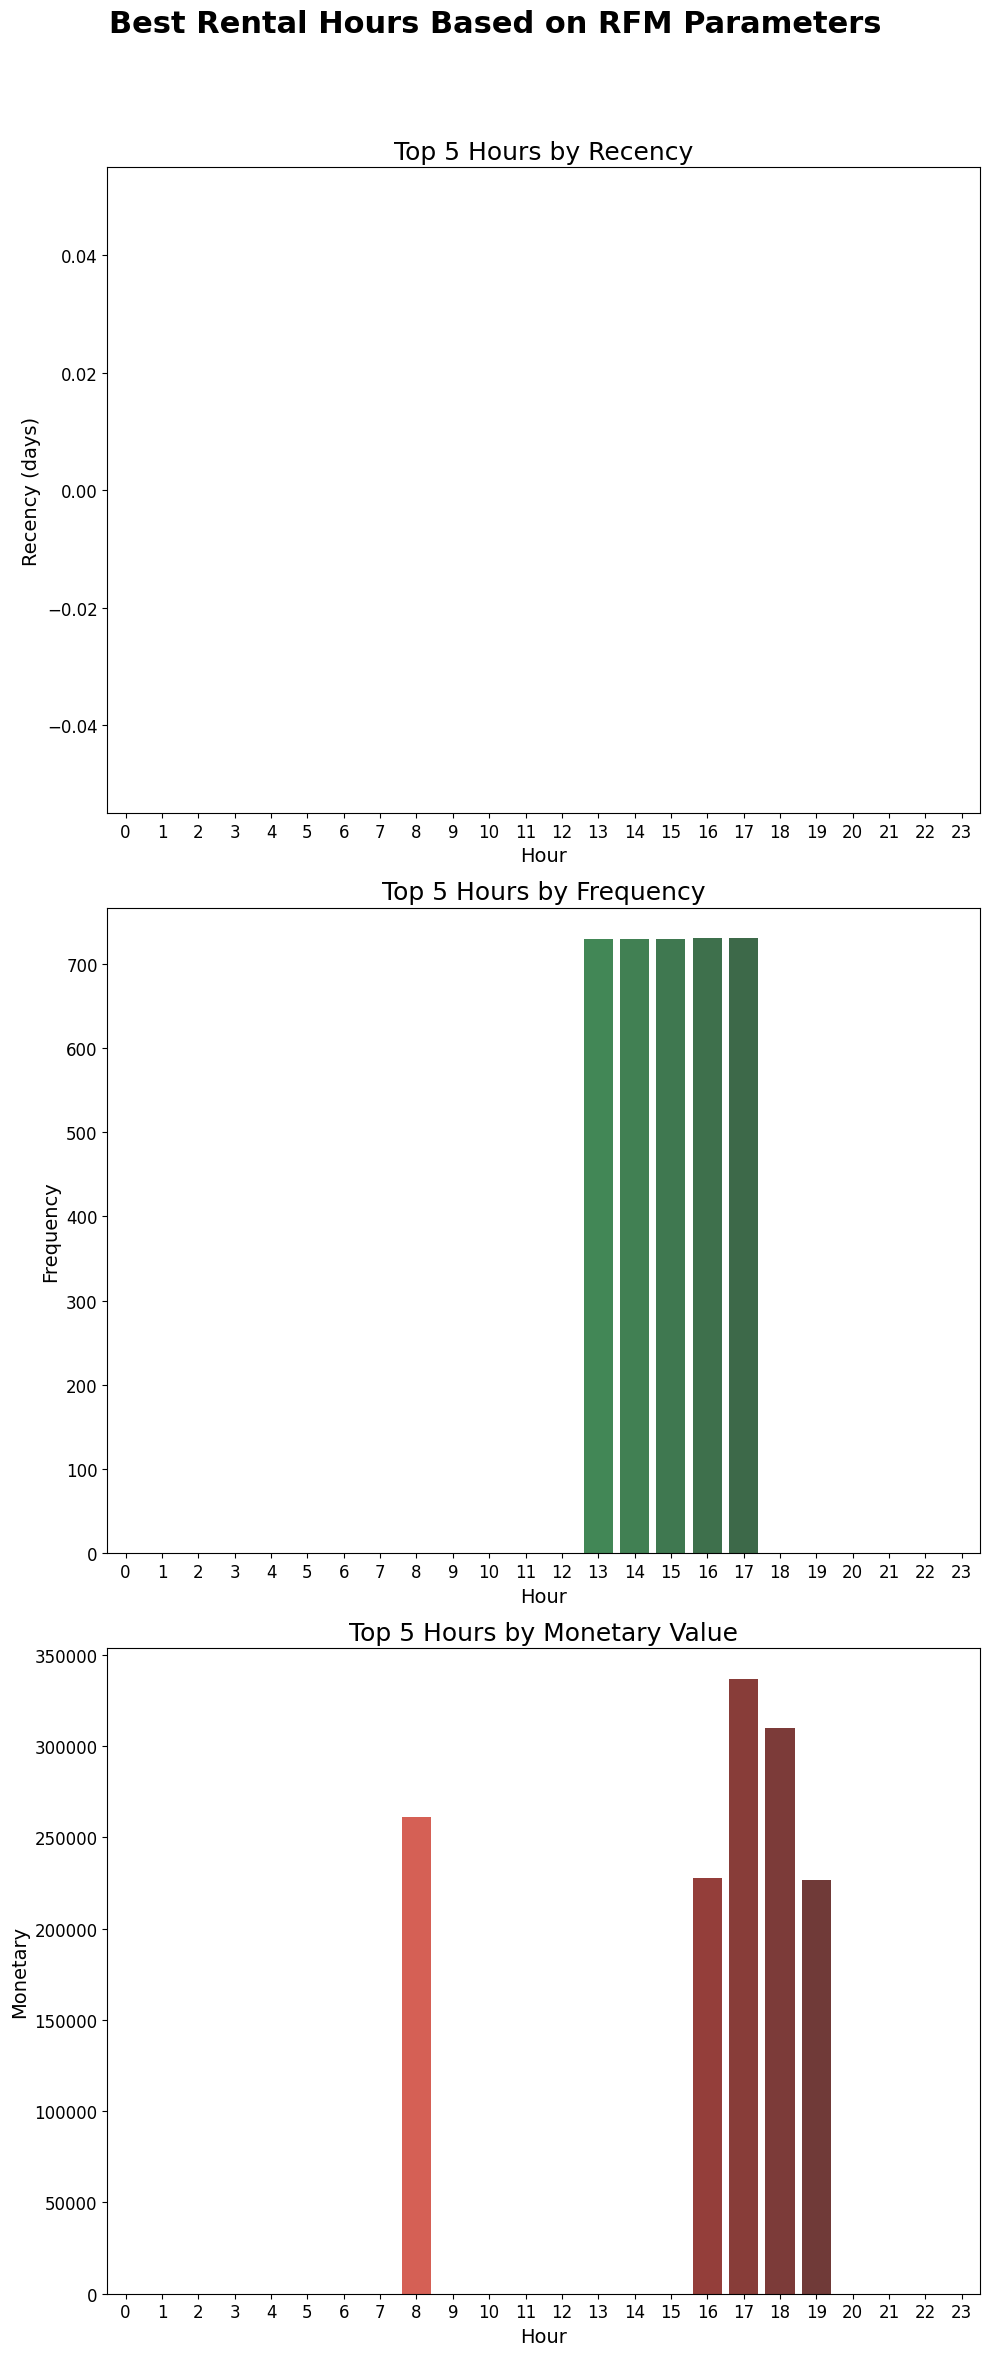

In [143]:
# Sort the RFM data
top_recency = rfm_df.sort_values(by="recency", ascending=True).head(5)
top_frequency = rfm_df.sort_values(by="order_count", ascending=False).head(5)
top_monetary = rfm_df.sort_values(by="revenue", ascending=False).head(5)

# Create subplots
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10, 24))

sns.barplot(
    data=top_recency, 
    x="hour", 
    y="recency",
    palette='Blues_d',
    ax=ax[0]
)
ax[0].set_ylabel("Recency (days)", fontsize=14)
ax[0].set_xlabel("Hour", fontsize=14)
ax[0].set_title("Top 5 Hours by Recency", fontsize=18)
ax[0].tick_params(axis='x', labelsize=12)
ax[0].tick_params(axis='y', labelsize=12)

# Plot top frequency
sns.barplot(
    data=top_frequency,
    x="hour",
    y="order_count", 
    palette='Greens_d',
    ax=ax[1]
)
ax[1].set_ylabel("Frequency", fontsize=14)
ax[1].set_xlabel("Hour", fontsize=14)
ax[1].set_title("Top 5 Hours by Frequency", fontsize=18)
ax[1].tick_params(axis='x', labelsize=12)
ax[1].tick_params(axis='y', labelsize=12)

# Plot top monetary
sns.barplot(
    data=top_monetary, 
    x="hour", 
    y="revenue", 
    palette='Reds_d',
    ax=ax[2]
)
ax[2].set_ylabel("Monetary", fontsize=14)
ax[2].set_xlabel("Hour", fontsize=14)
ax[2].set_title("Top 5 Hours by Monetary Value", fontsize=18)
ax[2].tick_params(axis='x', labelsize=12)
ax[2].tick_params(axis='y', labelsize=12)

# Set the overall title
plt.suptitle("Best Rental Hours Based on RFM Parameters", fontsize=22, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Identifying and visualizing the best hours based on RFM (Recency, Frequency, Monetary) parameters in the form of bar plots, making it easier to visually analyze the data.

- The top 5 hours by recency indicate the most recent hours with bike rentals, which can help in understanding the latest trends in bike usage.
- The top 5 hours by frequency show the hours with the highest number of rental transactions, highlighting peak hours for bike rentals.
- The top 5 hours by monetary value represent the hours generating the highest revenue, which is crucial for financial analysis and resource allocation.

In [144]:
data_hour.to_csv("dashboard/main_data.csv", index=False)

## Conclusion

- The highest total bike rentals occur in the fall season, with registered customers exceeding casual customers, and the lowest in the spring season, also with registered customers exceeding casual customers.

- Clear weather conditions are the most favorable for bike rentals, while light snow/rain conditions result in the lowest average rentals, indicating the significant impact of weather on bike rental behavior.

- Bike rentals peak during typical commuting hours on working days (around 8 AM and 5-6 PM) and during the afternoon on holidays or weekends (between 12 PM and 4 PM), suggesting a mix of commuting and leisure use.